In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import streamlit as st

In [2]:
warnings.filterwarnings(action='ignore', message='All-NaN slice encountered')
pd.options.mode.chained_assignment = None 

In [3]:
loan_df = pd.read_csv('loan_requests.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
loan_df = loan_df.drop('Loan_ID', axis=1)

In [7]:
#how many null values for each column
pd.isnull(loan_df).sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_df=loan_df.dropna()

In [9]:
pd.isnull(loan_df).sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan_df['CoapplicantIncome'] = loan_df['CoapplicantIncome'].astype('int64')
loan_df['LoanAmount'] = loan_df['LoanAmount'].astype('int64')
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].astype('int64')
loan_df['Credit_History'] = loan_df['Credit_History'].astype('int64')

In [11]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


In [12]:
loan_df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0,133,360,0,Semiurban,N


In [13]:
loan_df.shape

(480, 12)

In [14]:
#create column Total_Income
loan_df=loan_df.assign(Total_Income=loan_df.ApplicantIncome + loan_df.CoapplicantIncome)

In [15]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N,6091
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,3000
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y,4941
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y,6000
5,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y,9613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y,2900
610,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y,4106
611,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y,8312
612,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y,7583


In [16]:
#Data representation

In [17]:
#numerical data representation with boxplot and histogram

def num(column):
    fig, axes = plt.subplots(1,2, figsize=(10, 5))
    sns.set_style('whitegrid')
    sns.boxplot(ax=axes[ 0], data=loan_df, x=column,  color='green')
    sns.histplot(ax=axes[ 1], data=loan_df, x=column,  palette='blue')
    plt.show()
    

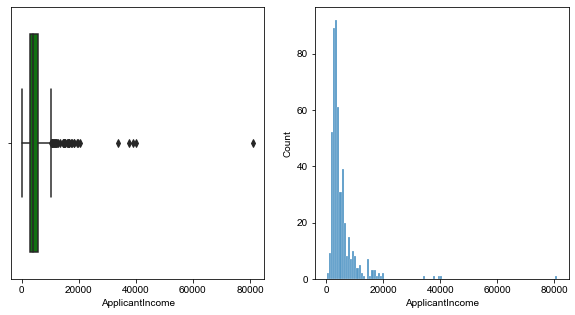

In [18]:
num(loan_df.ApplicantIncome)


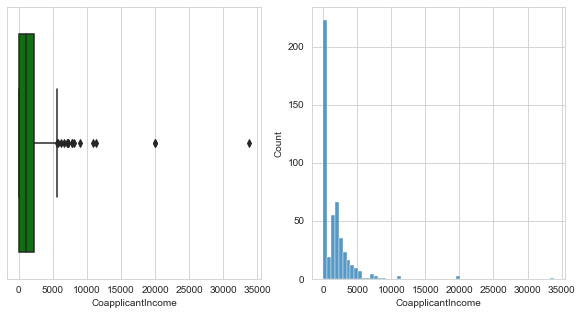

In [19]:
num(loan_df.CoapplicantIncome)

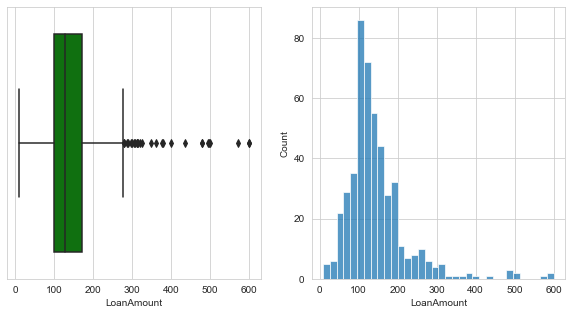

In [20]:
num(loan_df.LoanAmount)

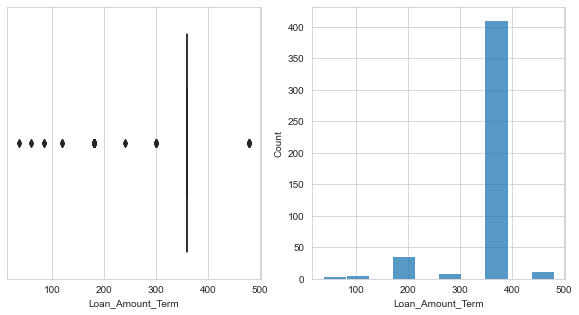

In [21]:
num(loan_df.Loan_Amount_Term)

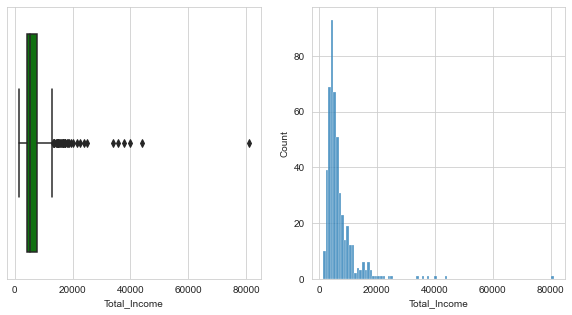

In [22]:
num(loan_df.Total_Income)

In [23]:
#Categorical data representation with pie plot

def pie(column):
    plt.figure(figsize=(10,5))
    pie_chart = column.value_counts()
    ax = pie_chart.plot.pie(shadow=True, startangle=90,autopct='%1.1f%%')
    plt.legend(column.value_counts().index.unique())
    plt.show()

In [24]:
#representation with catplot
def catplt(column):
    plt.figure(figsize=(15,10))
    sns.catplot(data=loan_df, x=column, kind="count", palette="Paired").set(title='Data Representation with Catplot')
    plt.show()

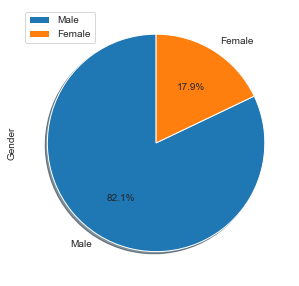

In [25]:
pie(loan_df.Gender)



<Figure size 1080x720 with 0 Axes>

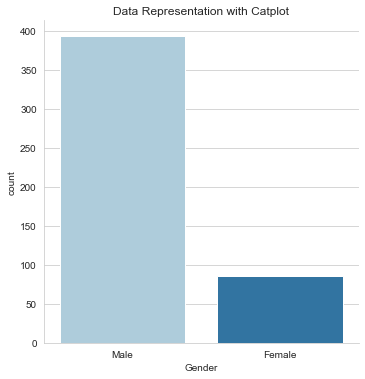

In [26]:
catplt(loan_df.Gender)

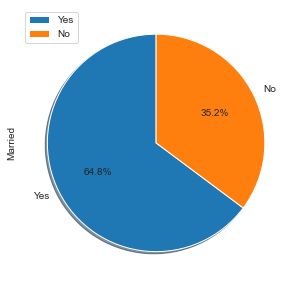

In [27]:
pie(loan_df.Married)

<Figure size 1080x720 with 0 Axes>

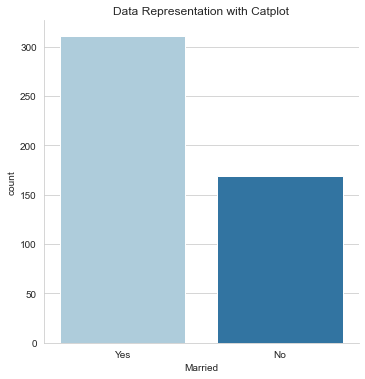

In [28]:
catplt(loan_df.Married)

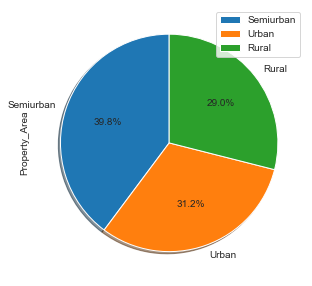

In [29]:
pie(loan_df.Property_Area)

<Figure size 1080x720 with 0 Axes>

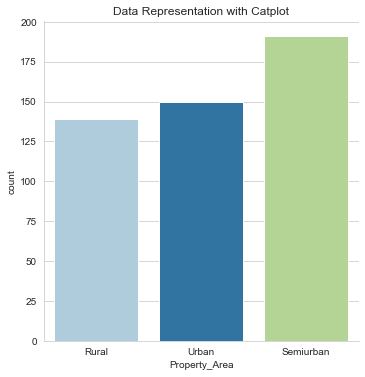

In [30]:
catplt(loan_df.Property_Area)

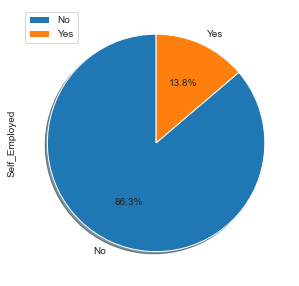

In [31]:
pie(loan_df.Self_Employed)

<Figure size 1080x720 with 0 Axes>

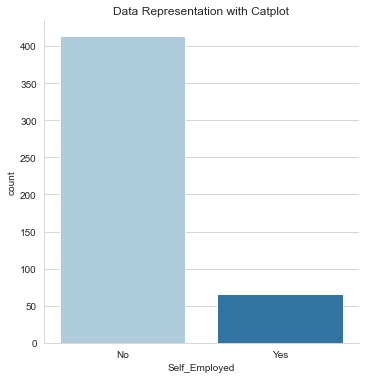

In [32]:
catplt(loan_df.Self_Employed)

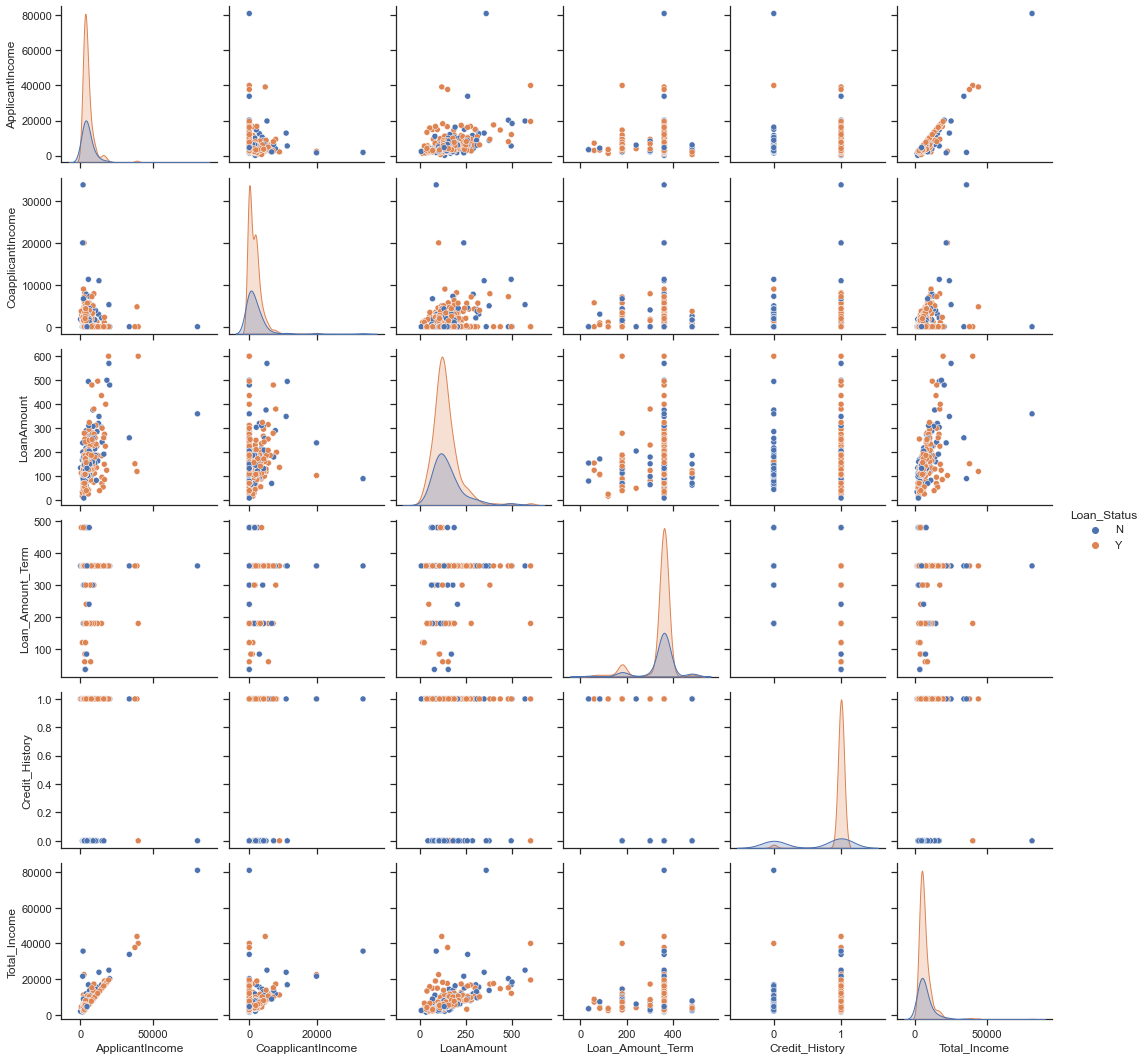

In [33]:
#pairplot
#Pairplot allows us to plot pairwise relationships between variables within a dataset

sns.set(style="ticks", color_codes=True)    
sns.pairplot(loan_df, hue='Loan_Status')
plt.show()



In [34]:
#Impact of different attributes on Loan_Status

In [35]:
def impact(column):
    
    df = loan_df.pivot_table(index=column, columns='Loan_Status', aggfunc='size')
    sns.set_style('whitegrid')
    ax=df.plot(kind='bar', stacked=False, color=['pink', 'purple'])
    for container in ax.containers:
        ax.bar_label(container)
        

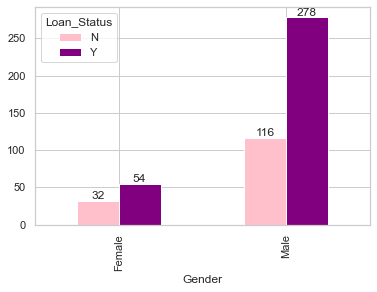

In [36]:
impact(loan_df.Gender)

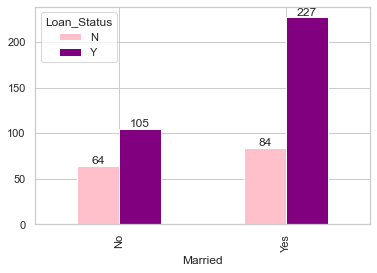

In [37]:
impact(loan_df.Married)

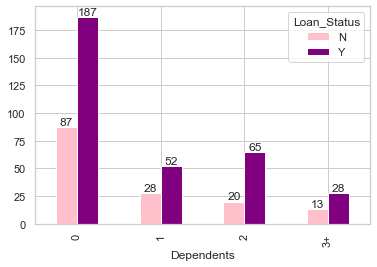

In [38]:
impact(loan_df.Dependents)

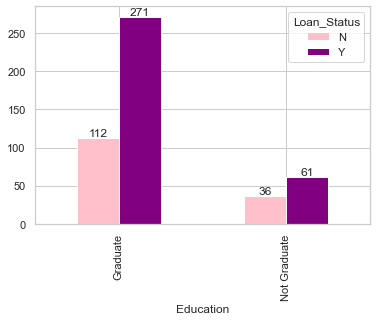

In [39]:
impact(loan_df.Education)

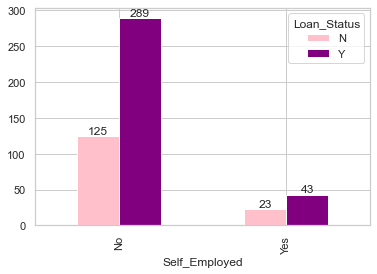

In [40]:
impact(loan_df.Self_Employed)

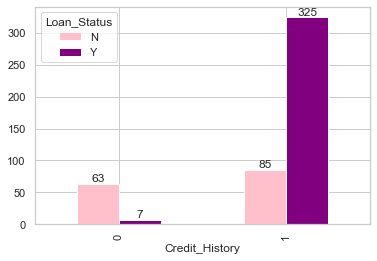

In [41]:
impact(loan_df.Credit_History)

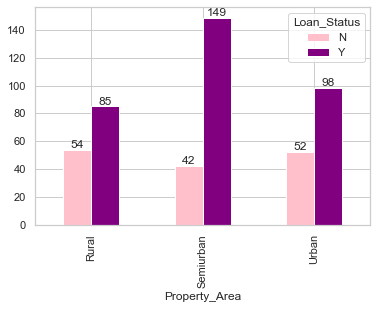

In [42]:
impact(loan_df.Property_Area)

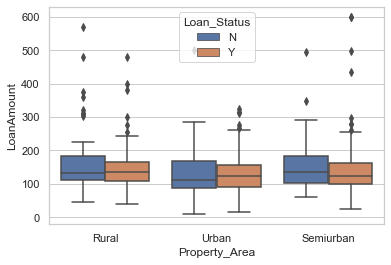

In [43]:
#How approved and rejected Loan amount change across Property areas

sns.boxplot( x='Property_Area', y='LoanAmount', hue='Loan_Status', data=loan_df)
plt.show()


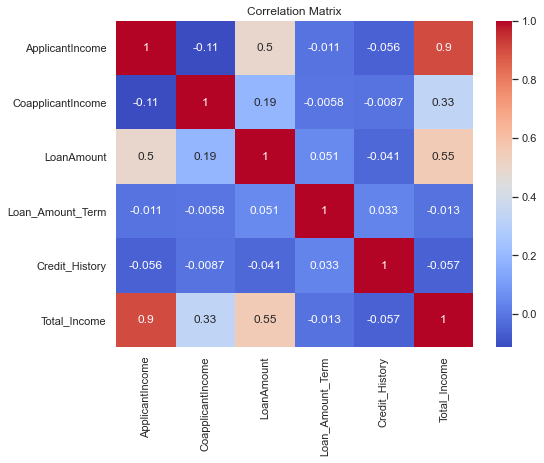

In [44]:
#Correlation Matrix
#A correlation matrix is a table showing correlation coefficients among your variables. 
#Each cell in the table shows the correlation between two variables.
#The correlation coefficient is a standardized metric that ranges from -1 and +1. Positive values indicate a positive correlation,
#negative values indicate a negative correlation. 0 indicates no correlation.
plt.figure(figsize=(8,6))
correlation_matrix = loan_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

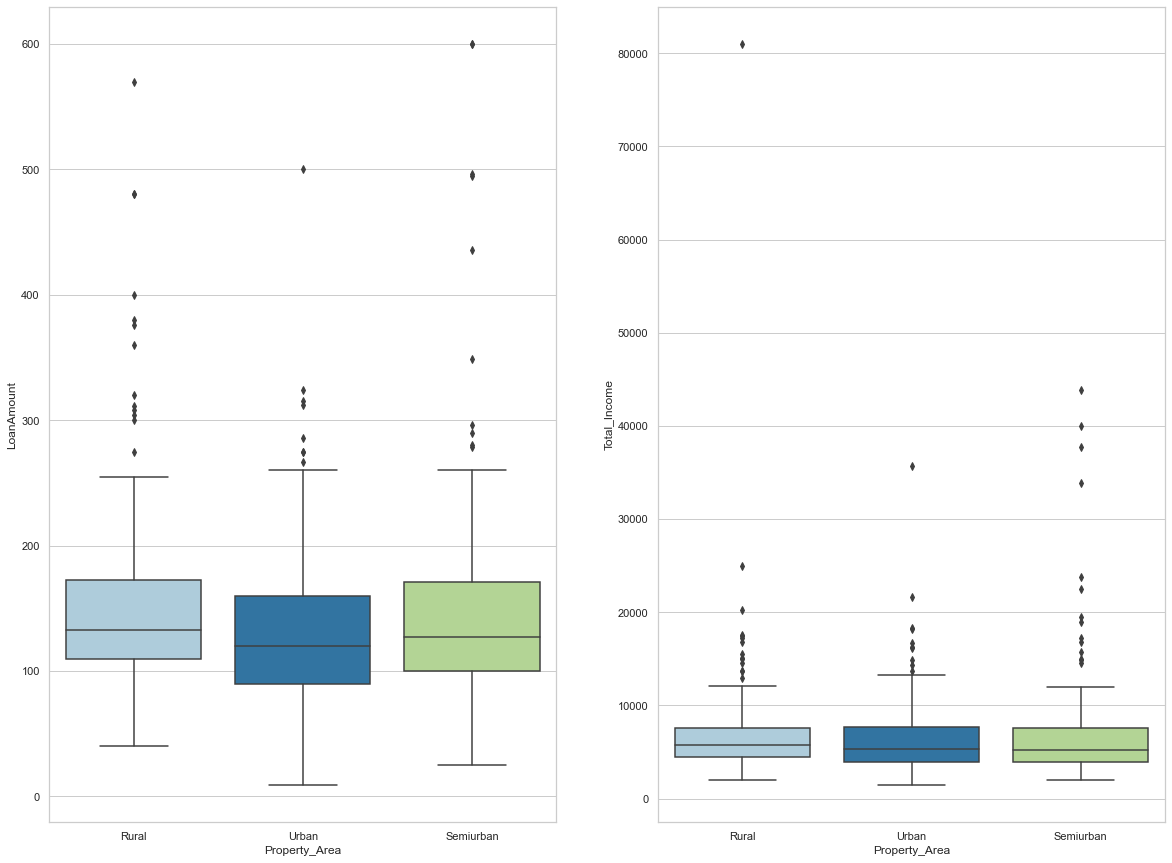

In [45]:
#How Loan_Amount and Total_Income changes depending on the Property_Area

fig, axes = plt.subplots(1,2, figsize=(20, 15))
sns.boxplot(ax=axes[ 0], data=loan_df, x='Property_Area', y='LoanAmount', palette='Paired')
sns.boxplot(ax=axes[ 1], data=loan_df, x='Property_Area', y='Total_Income', palette='Paired')
plt.show()


Text(0.5, 1.0, 'Loan Amount vs. Loan_Amount_Term')

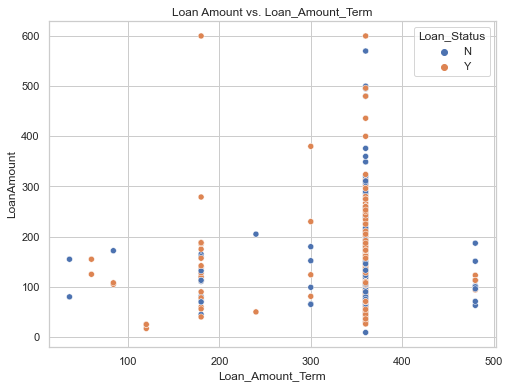

In [46]:
#How loan_amount impacts loan_term 
plt.figure(figsize=(8,6))
sns.scatterplot(x='Loan_Amount_Term', y='LoanAmount', hue='Loan_Status', data=loan_df)
plt.title('Loan Amount vs. Loan_Amount_Term')


<AxesSubplot:xlabel='LoanAmount', ylabel='Total_Income'>

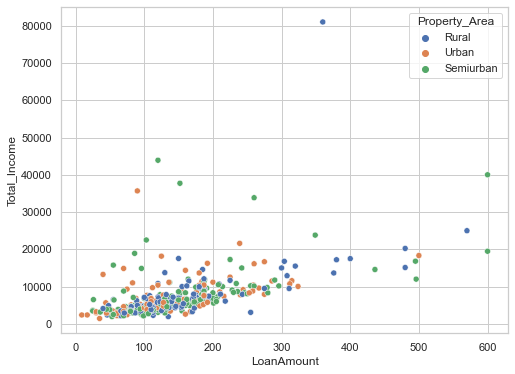

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='LoanAmount', y='Total_Income', hue='Property_Area', data=loan_df)


In [48]:
#Convert Y to 1 and N to 0
loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'Y': 1, 'N': 0})
loan_df['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [49]:
loan_num=loan_df.select_dtypes(include=[np.number])

In [50]:
loan_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
1,4583,1508,128,360,1,0,6091
2,3000,0,66,360,1,1,3000
3,2583,2358,120,360,1,1,4941
4,6000,0,141,360,1,1,6000
5,5417,4196,267,360,1,1,9613
...,...,...,...,...,...,...,...
609,2900,0,71,360,1,1,2900
610,4106,0,40,180,1,1,4106
611,8072,240,253,360,1,1,8312
612,7583,0,187,360,1,1,7583


In [51]:
#Naive Bayes 

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection  import train_test_split

In [53]:
#We now divide our dataframe into x and y components. The x variable includes all independent predictor factors,
#whereas the y variable provides the diagnostic prediction.

x = loan_num.drop(["Loan_Status"], axis = 1)
y = loan_num.Loan_Status.values


In [54]:
from sklearn.model_selection import train_test_split
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
print(nb.fit(x_train, y_train))

GaussianNB()


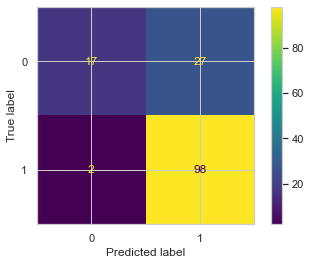

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,x_test,y_test)

In [57]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.7986111111111112
